In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mercedes_df=pd.read_csv('train.csv')
mercedes_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# assigning the output variable and dropping column from dataframe
merced= mercedes_df['y']

mercedes_df.drop(columns='y', inplace=True)

In [4]:
# Dropping the unique columns
cols_to_drop=[]
for col in mercedes_df.columns:
    if mercedes_df[col].nunique()==1 or mercedes_df[col].nunique()==mercedes_df.shape[0]:
        cols_to_drop.append(col)
        
cols_to_drop
mercedes_df.drop(columns=cols_to_drop, inplace=True)

In [5]:
# seperating categorical and continuous columns
cat_col=[col for col in mercedes_df.columns if mercedes_df[col].dtype==object]
con_col=[col for col in mercedes_df.columns if mercedes_df[col].dtype!=object]
cat_col

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [6]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(mercedes_df,merced, test_size=0.2, random_state=42)

In [7]:
# OneHot Encoding
onehottrain=pd.get_dummies(x_train[cat_col])
onehottest=pd.get_dummies(x_test[cat_col])
onehottrain.shape

(3367, 193)

In [8]:
x_train_final,x_test_final=onehottrain.align(onehottest,join='inner',axis=1,fill_value=0)# aligning train and test data
x_train_final.shape

(3367, 170)

In [9]:
# concatenate categorical and continuous
train = pd.concat([x_train[con_col], x_train_final], axis = 1) # joining scaled and onehot data
test=pd.concat([x_test[con_col],x_test_final], axis=1)

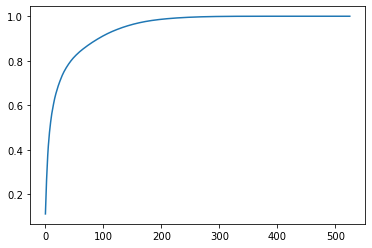

In [10]:
# Principal Component Analysis
pca=PCA()
train_pca_df=pd.DataFrame(pca.fit_transform(train))
pca.explained_variance_ #eigen value for the corresponding eigen vector
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [11]:
# fitting pca to train and test data
pca_1=PCA(n_components=50)
train_pca_df=pd.DataFrame(pca_1.fit_transform(train),columns=list(range(0,50)))
test_pca_df=pd.DataFrame(pca_1.transform(test))

In [12]:
# proof that PCA results in zero or No Multicollinearity
vif_pca=pd.DataFrame()
vif_pca['VIF Factor_PCA']=[variance_inflation_factor(train_pca_df.values,i) for i in range(train_pca_df.shape[1])]
vif_pca['Column Name']=train_pca_df.columns
vif_pca

,VIF Factor_PCA,Column Name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


In [13]:
tree=DecisionTreeRegressor(max_depth=8)

tree.fit(train,y_train)
pred_tree=tree.predict(test)

print('Train Score:',tree.score(train,y_train))
print('Test Score:',tree.score(test,y_test))

Train Score: 0.6332015759158677
Test Score: 0.5187585654412155


In [14]:
tree.fit(train_pca_df,y_train)
tree.predict(test_pca_df)


DecisionTreeRegressor(max_depth=8)

In [39]:
TrainScore_DT_pca=tree.score(train_pca_df,y_train)
TestScore_DT_pca=tree.score(test_pca_df,y_test)

In [15]:
for_reg=RandomForestRegressor(random_state=42)
param_dict={'n_estimators': [20,40,60,80],
           'max_depth':[4,6,8],
           'min_samples_split':[2,3,4],
           'max_features':['auto','sqrt','log2']}
gcv=GridSearchCV(for_reg,param_grid=param_dict,cv=5,verbose=5)
gcv.fit(train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.416, total=   0.9s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.595, total=   1.0s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.600, total=   1.0s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.587, total=   1.0s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.580, total=   1.0s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40, score=0.413, total=   1.8s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40, score=0.595, total=   2.1s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40, score=0.604, total=   2.2s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40, score=0.593, total=   1.7s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40, score=0.583, total=   1.7s
[CV] ma

[CV]  max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60, score=0.595, total=   2.5s
[CV] max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60, score=0.605, total=   2.5s
[CV] max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60, score=0.595, total=   2.5s
[CV] max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60, score=0.584, total=   2.5s
[CV] max_depth=4, max_features=auto, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_features=auto, min_samples_split=4, n_estimators=80, score=0.413, total=   3.3s
[CV] max_depth=4, max_features=auto, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_features=auto, min_samples_split=4, n_estimators=80, score=0.596, total=   3.3s
[CV] ma

[CV]  max_depth=4, max_features=sqrt, min_samples_split=3, n_estimators=80, score=0.495, total=   0.4s
[CV] max_depth=4, max_features=sqrt, min_samples_split=3, n_estimators=80 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=3, n_estimators=80, score=0.463, total=   0.4s
[CV] max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20, score=0.337, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20, score=0.466, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20, score=0.529, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20, score=0.470, total=   0.1s
[CV] ma

[CV]  max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40, score=0.226, total=   0.2s
[CV] max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40 
[CV]  max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40, score=0.334, total=   0.2s
[CV] max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40 
[CV]  max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40, score=0.386, total=   0.2s
[CV] max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40 
[CV]  max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40, score=0.368, total=   0.2s
[CV] max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40 
[CV]  max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40, score=0.308, total=   0.2s
[CV] max_depth=4, max_features=log2, min_samples_split=3, n_estimators=60 
[CV]  max_depth=4, max_features=log2, min_samples_split=3, n_estimators=60, score=0.234, total=   0.3s
[CV] ma

[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=60, score=0.608, total=   3.5s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=60 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=60, score=0.543, total=   4.1s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=60 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=60, score=0.582, total=   4.7s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80, score=0.415, total=   4.9s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80, score=0.594, total=   4.6s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80, score=0.612, total=   4.6s
[CV] ma

[CV]  max_depth=6, max_features=auto, min_samples_split=4, n_estimators=80, score=0.581, total=   4.6s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20, score=0.371, total=   0.2s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20, score=0.519, total=   0.2s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20, score=0.577, total=   0.2s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20, score=0.537, total=   0.2s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20, score=0.522, total=   0.2s
[CV] ma

[CV]  max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40, score=0.517, total=   0.4s
[CV] max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40, score=0.579, total=   0.3s
[CV] max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40, score=0.541, total=   0.5s
[CV] max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40, score=0.504, total=   0.4s
[CV] max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=60, score=0.364, total=   0.2s
[CV] max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=60, score=0.515, total=   0.2s
[CV] ma

[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=60, score=0.454, total=   0.3s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=60, score=0.396, total=   0.3s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80, score=0.280, total=   0.4s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80, score=0.419, total=   0.4s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80, score=0.481, total=   0.4s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80, score=0.454, total=   0.4s
[CV] ma

[CV]  max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20, score=0.417, total=   1.5s
[CV] max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20 
[CV]  max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20, score=0.592, total=   1.7s
[CV] max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20 
[CV]  max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20, score=0.597, total=   1.7s
[CV] max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20 
[CV]  max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20, score=0.476, total=   1.8s
[CV] max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20 
[CV]  max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20, score=0.576, total=   1.7s
[CV] max_depth=8, max_features=auto, min_samples_split=3, n_estimators=40 
[CV]  max_depth=8, max_features=auto, min_samples_split=3, n_estimators=40, score=0.416, total=   3.4s
[CV] ma

[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.599, total=   0.3s
[CV] max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.573, total=   0.3s
[CV] max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.544, total=   0.3s
[CV] max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=60 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=60, score=0.382, total=   0.5s
[CV] max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=60 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=60, score=0.538, total=   0.5s
[CV] max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=60 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=60, score=0.603, total=   0.5s
[CV] ma

[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=60, score=0.535, total=   0.5s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80, score=0.382, total=   0.6s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80, score=0.544, total=   0.6s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80, score=0.594, total=   0.6s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80, score=0.571, total=   0.6s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80, score=0.537, total=   0.6s
[CV] ma

[CV]  max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20, score=0.465, total=   0.1s
[CV] max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20, score=0.515, total=   0.1s
[CV] max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20, score=0.498, total=   0.1s
[CV] max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20, score=0.440, total=   0.1s
[CV] max_depth=8, max_features=log2, min_samples_split=4, n_estimators=40 
[CV]  max_depth=8, max_features=log2, min_samples_split=4, n_estimators=40, score=0.307, total=   0.2s
[CV] max_depth=8, max_features=log2, min_samples_split=4, n_estimators=40 
[CV]  max_depth=8, max_features=log2, min_samples_split=4, n_estimators=40, score=0.453, total=   0.2s
[CV] ma

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 10.9min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [20, 40, 60, 80]},
             verbose=5)

In [16]:
gcv.predict(test)


array([ 94.30877709,  94.10272666, 113.16112861,  77.29919242,
       112.39254135,  94.10272666,  94.10272666, 103.09247738,
       103.5193998 , 112.57185567,  77.86410157,  94.99659958,
        94.10272666, 103.11700813,  94.10272666,  94.10272666,
       112.35877568,  94.10272666,  94.10272666, 113.41348074,
       112.57185567,  94.10272666,  94.25591592, 102.87529505,
        94.10272666, 112.42269502,  94.10272666,  77.7783878 ,
        94.10272666,  94.30877709,  94.10272666, 102.42061249,
        94.10272666, 112.35877568,  94.10272666, 112.50590945,
       112.9734748 ,  94.10272666,  94.10272666,  94.10272666,
       112.57185567, 112.35877568,  94.10272666, 112.4564607 ,
        94.10272666,  94.25591592,  94.10272666, 102.95496916,
       112.35877568, 103.11700813,  94.10272666, 102.41916478,
       107.33553792, 103.01639228,  94.10272666,  94.25591592,
        94.10272666, 112.35877568,  94.10272666,  94.10272666,
       112.35877568,  77.37622937,  94.20123275,  94.10

In [17]:
gcv.fit(train_pca_df,y_train)

gcv.predict(test_pca_df)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.314, total=   1.3s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.417, total=   1.2s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.482, total=   1.2s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.430, total=   1.2s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.398, total=   1.2s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40, score=0.318, total=   2.5s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40, score=0.419, total=   2.4s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40, score=0.480, total=   2.6s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40, score=0.430, total=   2.6s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=40, score=0.398, total=   2.7s
[CV] ma

[CV]  max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60, score=0.420, total=   3.7s
[CV] max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60, score=0.485, total=   3.8s
[CV] max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60, score=0.434, total=   3.6s
[CV] max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_split=4, n_estimators=60, score=0.403, total=   3.7s
[CV] max_depth=4, max_features=auto, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_features=auto, min_samples_split=4, n_estimators=80, score=0.319, total=   4.9s
[CV] max_depth=4, max_features=auto, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_features=auto, min_samples_split=4, n_estimators=80, score=0.421, total=   4.9s
[CV] ma

[CV]  max_depth=4, max_features=sqrt, min_samples_split=3, n_estimators=80, score=0.360, total=   0.9s
[CV] max_depth=4, max_features=sqrt, min_samples_split=3, n_estimators=80 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=3, n_estimators=80, score=0.324, total=   1.1s
[CV] max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20, score=0.256, total=   0.2s
[CV] max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20, score=0.338, total=   0.2s
[CV] max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20, score=0.383, total=   0.3s
[CV] max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=20, score=0.347, total=   0.3s
[CV] ma

[CV]  max_depth=4, max_features=log2, min_samples_split=3, n_estimators=20, score=0.298, total=   0.2s
[CV] max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40 
[CV]  max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40, score=0.235, total=   0.4s
[CV] max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40 
[CV]  max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40, score=0.326, total=   0.4s
[CV] max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40 
[CV]  max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40, score=0.339, total=   0.4s
[CV] max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40 
[CV]  max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40, score=0.322, total=   0.4s
[CV] max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40 
[CV]  max_depth=4, max_features=log2, min_samples_split=3, n_estimators=40, score=0.287, total=   0.4s
[CV] ma

[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=60, score=0.490, total=   5.4s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=60 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=60, score=0.538, total=   5.2s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=60 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=60, score=0.499, total=   5.2s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=60 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=60, score=0.454, total=   5.2s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80, score=0.357, total=   6.8s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80, score=0.493, total=   6.9s
[CV] ma

[CV]  max_depth=6, max_features=auto, min_samples_split=4, n_estimators=80, score=0.501, total=   6.9s
[CV] max_depth=6, max_features=auto, min_samples_split=4, n_estimators=80 
[CV]  max_depth=6, max_features=auto, min_samples_split=4, n_estimators=80, score=0.451, total=   7.0s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20, score=0.320, total=   0.3s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20, score=0.433, total=   0.3s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20, score=0.479, total=   0.3s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=20, score=0.439, total=   0.3s
[CV] ma

[CV]  max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40, score=0.331, total=   0.6s
[CV] max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40, score=0.441, total=   0.6s
[CV] max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40, score=0.485, total=   0.6s
[CV] max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40, score=0.451, total=   0.6s
[CV] max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=40, score=0.412, total=   0.6s
[CV] max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=60, score=0.330, total=   1.0s
[CV] ma

[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=60, score=0.452, total=   0.7s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=60, score=0.418, total=   0.7s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=60, score=0.384, total=   0.7s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80, score=0.295, total=   1.0s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80, score=0.415, total=   1.0s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=80, score=0.451, total=   0.9s
[CV] ma

[CV]  max_depth=8, max_features=auto, min_samples_split=2, n_estimators=80, score=0.481, total=   8.8s
[CV] max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20 
[CV]  max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20, score=0.355, total=   2.2s
[CV] max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20 
[CV]  max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20, score=0.522, total=   2.1s
[CV] max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20 
[CV]  max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20, score=0.544, total=   2.2s
[CV] max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20 
[CV]  max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20, score=0.514, total=   2.2s
[CV] max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20 
[CV]  max_depth=8, max_features=auto, min_samples_split=3, n_estimators=20, score=0.478, total=   2.2s
[CV] ma

[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.484, total=   0.7s
[CV] max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.533, total=   0.7s
[CV] max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.488, total=   0.8s
[CV] max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.466, total=   0.8s
[CV] max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=60 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=60, score=0.364, total=   1.1s
[CV] max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=60 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=60, score=0.480, total=   1.1s
[CV] ma

[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=60, score=0.491, total=   1.1s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=60 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=60, score=0.473, total=   1.1s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80, score=0.353, total=   1.5s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80, score=0.484, total=   1.5s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80, score=0.529, total=   1.5s
[CV] max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=80, score=0.498, total=   1.5s
[CV] ma

[CV]  max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20, score=0.324, total=   0.3s
[CV] max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20, score=0.451, total=   0.3s
[CV] max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20, score=0.491, total=   0.3s
[CV] max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20, score=0.470, total=   0.3s
[CV] max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=8, max_features=log2, min_samples_split=4, n_estimators=20, score=0.433, total=   0.3s
[CV] max_depth=8, max_features=log2, min_samples_split=4, n_estimators=40 
[CV]  max_depth=8, max_features=log2, min_samples_split=4, n_estimators=40, score=0.327, total=   0.6s
[CV] ma

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 17.3min finished


array([119.2760473 ,  94.21335744, 110.69511901,  76.76276493,
       111.21498263, 103.17774906,  93.93776599,  98.52492058,
       103.09016024, 113.7772365 ,  76.56599097,  94.27012852,
        93.81427191, 102.40004364,  93.7262278 ,  93.94481772,
       109.81209056,  94.13849754,  94.41077107, 112.32368749,
       111.88545897,  94.35660619,  95.78226005, 104.33323879,
        96.9112019 , 111.56097414,  93.98896122,  81.6504889 ,
        94.06679725,  93.7705323 ,  93.73405582, 101.00186204,
        94.7272511 , 110.34253353, 105.87132085, 139.67165597,
        99.4221727 ,  94.27621804,  93.84653915,  96.32320285,
       111.30277355, 111.03296629, 106.49168091, 111.31972994,
        94.6765786 ,  94.45932224,  93.85580012, 102.78003567,
       110.94012563, 104.07424383,  94.13690821, 101.55071154,
       104.1698593 , 106.51896843,  95.290109  ,  98.98758419,
        93.7705323 , 111.22679406,  96.2331558 ,  96.68034215,
       111.29338089,  77.8588332 ,  94.74896525,  94.72

In [36]:
TrainScore_RF_pca=gcv.score(train_pca_df,y_train)
TestScore_RF_pca=gcv.score(test_pca_df,y_test)

In [18]:
rscv=RandomizedSearchCV(for_reg,param_distributions=param_dict, cv=5, verbose=5, n_iter=300)
rscv.fit(train,y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4, score=0.416, total=   0.9s
[CV] n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4, score=0.595, total=   0.9s
[CV] n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4, score=0.600, total=   0.9s
[CV] n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4, score=0.587, total=   0.9s
[CV] n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4, score=0.580, total=   0.9s
[CV] n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4, score=0.413, total=   1.7s
[CV] n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4, score=0.595, total=   1.7s
[CV] n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4, score=0.604, total=   1.7s
[CV] n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4, score=0.593, total=   1.7s
[CV] n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4, score=0.583, total=   1.7s
[CV] n_

[CV]  n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4, score=0.595, total=   2.5s
[CV] n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4 
[CV]  n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4, score=0.605, total=   2.6s
[CV] n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4 
[CV]  n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4, score=0.595, total=   2.5s
[CV] n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4 
[CV]  n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4, score=0.584, total=   2.6s
[CV] n_estimators=80, min_samples_split=4, max_features=auto, max_depth=4 
[CV]  n_estimators=80, min_samples_split=4, max_features=auto, max_depth=4, score=0.413, total=   3.4s
[CV] n_estimators=80, min_samples_split=4, max_features=auto, max_depth=4 
[CV]  n_estimators=80, min_samples_split=4, max_features=auto, max_depth=4, score=0.596, total=   3.3s
[CV] n_

[CV]  n_estimators=80, min_samples_split=3, max_features=sqrt, max_depth=4, score=0.495, total=   0.5s
[CV] n_estimators=80, min_samples_split=3, max_features=sqrt, max_depth=4 
[CV]  n_estimators=80, min_samples_split=3, max_features=sqrt, max_depth=4, score=0.463, total=   0.5s
[CV] n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4, score=0.337, total=   0.2s
[CV] n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4, score=0.466, total=   0.2s
[CV] n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4, score=0.529, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4, score=0.470, total=   0.2s
[CV] n_

[CV]  n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4, score=0.226, total=   0.2s
[CV] n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4 
[CV]  n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4, score=0.334, total=   0.2s
[CV] n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4 
[CV]  n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4, score=0.386, total=   0.2s
[CV] n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4 
[CV]  n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4, score=0.368, total=   0.2s
[CV] n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4 
[CV]  n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4, score=0.308, total=   0.2s
[CV] n_estimators=60, min_samples_split=3, max_features=log2, max_depth=4 
[CV]  n_estimators=60, min_samples_split=3, max_features=log2, max_depth=4, score=0.234, total=   0.3s
[CV] n_

[CV]  n_estimators=60, min_samples_split=2, max_features=auto, max_depth=6, score=0.608, total=   3.5s
[CV] n_estimators=60, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=60, min_samples_split=2, max_features=auto, max_depth=6, score=0.543, total=   3.5s
[CV] n_estimators=60, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=60, min_samples_split=2, max_features=auto, max_depth=6, score=0.582, total=   3.5s
[CV] n_estimators=80, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=80, min_samples_split=2, max_features=auto, max_depth=6, score=0.415, total=   4.6s
[CV] n_estimators=80, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=80, min_samples_split=2, max_features=auto, max_depth=6, score=0.594, total=   4.6s
[CV] n_estimators=80, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=80, min_samples_split=2, max_features=auto, max_depth=6, score=0.612, total=   4.7s
[CV] n_

[CV]  n_estimators=80, min_samples_split=4, max_features=auto, max_depth=6, score=0.581, total=   4.6s
[CV] n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.371, total=   0.2s
[CV] n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.519, total=   0.2s
[CV] n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.577, total=   0.2s
[CV] n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.537, total=   0.2s
[CV] n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.522, total=   0.2s
[CV] n_

[CV]  n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6, score=0.517, total=   0.3s
[CV] n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6, score=0.579, total=   0.3s
[CV] n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6, score=0.541, total=   0.3s
[CV] n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6, score=0.504, total=   0.3s
[CV] n_estimators=60, min_samples_split=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=60, min_samples_split=4, max_features=sqrt, max_depth=6, score=0.364, total=   0.4s
[CV] n_estimators=60, min_samples_split=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=60, min_samples_split=4, max_features=sqrt, max_depth=6, score=0.515, total=   0.4s
[CV] n_

[CV]  n_estimators=60, min_samples_split=3, max_features=log2, max_depth=6, score=0.454, total=   0.3s
[CV] n_estimators=60, min_samples_split=3, max_features=log2, max_depth=6 
[CV]  n_estimators=60, min_samples_split=3, max_features=log2, max_depth=6, score=0.396, total=   0.3s
[CV] n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6 
[CV]  n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6, score=0.280, total=   0.4s
[CV] n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6 
[CV]  n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6, score=0.419, total=   0.4s
[CV] n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6 
[CV]  n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6, score=0.481, total=   0.4s
[CV] n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6 
[CV]  n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6, score=0.454, total=   0.4s
[CV] n_

[CV]  n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8, score=0.417, total=   1.7s
[CV] n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8 
[CV]  n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8, score=0.592, total=   1.5s
[CV] n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8 
[CV]  n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8, score=0.597, total=   1.5s
[CV] n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8 
[CV]  n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8, score=0.476, total=   1.5s
[CV] n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8 
[CV]  n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8, score=0.576, total=   1.5s
[CV] n_estimators=40, min_samples_split=3, max_features=auto, max_depth=8 
[CV]  n_estimators=40, min_samples_split=3, max_features=auto, max_depth=8, score=0.416, total=   3.0s
[CV] n_

[CV]  n_estimators=40, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.599, total=   0.4s
[CV] n_estimators=40, min_samples_split=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=40, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.573, total=   0.4s
[CV] n_estimators=40, min_samples_split=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=40, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.544, total=   0.4s
[CV] n_estimators=60, min_samples_split=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=60, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.382, total=   0.5s
[CV] n_estimators=60, min_samples_split=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=60, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.538, total=   0.5s
[CV] n_estimators=60, min_samples_split=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=60, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.603, total=   0.5s
[CV] n_

[CV]  n_estimators=60, min_samples_split=4, max_features=sqrt, max_depth=8, score=0.535, total=   0.5s
[CV] n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8, score=0.382, total=   0.8s
[CV] n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8, score=0.544, total=   0.9s
[CV] n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8, score=0.594, total=   0.8s
[CV] n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8, score=0.571, total=   0.8s
[CV] n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8, score=0.537, total=   0.9s
[CV] n_

[CV]  n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8, score=0.465, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8 
[CV]  n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8, score=0.515, total=   0.2s
[CV] n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8 
[CV]  n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8, score=0.498, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8 
[CV]  n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8, score=0.440, total=   0.1s
[CV] n_estimators=40, min_samples_split=4, max_features=log2, max_depth=8 
[CV]  n_estimators=40, min_samples_split=4, max_features=log2, max_depth=8, score=0.307, total=   0.2s
[CV] n_estimators=40, min_samples_split=4, max_features=log2, max_depth=8 
[CV]  n_estimators=40, min_samples_split=4, max_features=log2, max_depth=8, score=0.453, total=   0.2s
[CV] n_

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 11.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=300,
                   param_distributions={'max_depth': [4, 6, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [20, 40, 60, 80]},
                   verbose=5)

In [19]:
rscv.predict(test)

array([ 94.30877709,  94.10272666, 113.16112861,  77.29919242,
       112.39254135,  94.10272666,  94.10272666, 103.09247738,
       103.5193998 , 112.57185567,  77.86410157,  94.99659958,
        94.10272666, 103.11700813,  94.10272666,  94.10272666,
       112.35877568,  94.10272666,  94.10272666, 113.41348074,
       112.57185567,  94.10272666,  94.25591592, 102.87529505,
        94.10272666, 112.42269502,  94.10272666,  77.7783878 ,
        94.10272666,  94.30877709,  94.10272666, 102.42061249,
        94.10272666, 112.35877568,  94.10272666, 112.50590945,
       112.9734748 ,  94.10272666,  94.10272666,  94.10272666,
       112.57185567, 112.35877568,  94.10272666, 112.4564607 ,
        94.10272666,  94.25591592,  94.10272666, 102.95496916,
       112.35877568, 103.11700813,  94.10272666, 102.41916478,
       107.33553792, 103.01639228,  94.10272666,  94.25591592,
        94.10272666, 112.35877568,  94.10272666,  94.10272666,
       112.35877568,  77.37622937,  94.20123275,  94.10

In [20]:
rscv.fit(train_pca_df,y_train)
rscv.predict(test_pca_df)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4, score=0.314, total=   1.3s
[CV] n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4, score=0.417, total=   1.2s
[CV] n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4, score=0.482, total=   1.2s
[CV] n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4, score=0.430, total=   1.3s
[CV] n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=2, max_features=auto, max_depth=4, score=0.398, total=   1.3s
[CV] n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4, score=0.318, total=   2.5s
[CV] n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4, score=0.419, total=   2.4s
[CV] n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4, score=0.480, total=   2.5s
[CV] n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4, score=0.430, total=   2.5s
[CV] n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=2, max_features=auto, max_depth=4, score=0.398, total=   2.5s
[CV] n_

[CV]  n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4, score=0.420, total=   3.7s
[CV] n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4 
[CV]  n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4, score=0.485, total=   3.7s
[CV] n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4 
[CV]  n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4, score=0.434, total=   3.7s
[CV] n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4 
[CV]  n_estimators=60, min_samples_split=4, max_features=auto, max_depth=4, score=0.403, total=   3.7s
[CV] n_estimators=80, min_samples_split=4, max_features=auto, max_depth=4 
[CV]  n_estimators=80, min_samples_split=4, max_features=auto, max_depth=4, score=0.319, total=   5.3s
[CV] n_estimators=80, min_samples_split=4, max_features=auto, max_depth=4 
[CV]  n_estimators=80, min_samples_split=4, max_features=auto, max_depth=4, score=0.421, total=   4.9s
[CV] n_

[CV]  n_estimators=80, min_samples_split=3, max_features=sqrt, max_depth=4, score=0.360, total=   0.9s
[CV] n_estimators=80, min_samples_split=3, max_features=sqrt, max_depth=4 
[CV]  n_estimators=80, min_samples_split=3, max_features=sqrt, max_depth=4, score=0.324, total=   0.9s
[CV] n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4, score=0.256, total=   0.2s
[CV] n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4, score=0.338, total=   0.3s
[CV] n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4, score=0.383, total=   0.3s
[CV] n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=20, min_samples_split=4, max_features=sqrt, max_depth=4, score=0.347, total=   0.3s
[CV] n_

[CV]  n_estimators=20, min_samples_split=3, max_features=log2, max_depth=4, score=0.298, total=   0.2s
[CV] n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4 
[CV]  n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4, score=0.235, total=   0.4s
[CV] n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4 
[CV]  n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4, score=0.326, total=   0.4s
[CV] n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4 
[CV]  n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4, score=0.339, total=   0.4s
[CV] n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4 
[CV]  n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4, score=0.322, total=   0.4s
[CV] n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4 
[CV]  n_estimators=40, min_samples_split=3, max_features=log2, max_depth=4, score=0.287, total=   0.4s
[CV] n_

[CV]  n_estimators=60, min_samples_split=2, max_features=auto, max_depth=6, score=0.490, total=   5.2s
[CV] n_estimators=60, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=60, min_samples_split=2, max_features=auto, max_depth=6, score=0.538, total=   5.2s
[CV] n_estimators=60, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=60, min_samples_split=2, max_features=auto, max_depth=6, score=0.499, total=   5.2s
[CV] n_estimators=60, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=60, min_samples_split=2, max_features=auto, max_depth=6, score=0.454, total=   5.2s
[CV] n_estimators=80, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=80, min_samples_split=2, max_features=auto, max_depth=6, score=0.357, total=   6.9s
[CV] n_estimators=80, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=80, min_samples_split=2, max_features=auto, max_depth=6, score=0.493, total=   6.9s
[CV] n_

[CV]  n_estimators=80, min_samples_split=4, max_features=auto, max_depth=6, score=0.501, total=   7.3s
[CV] n_estimators=80, min_samples_split=4, max_features=auto, max_depth=6 
[CV]  n_estimators=80, min_samples_split=4, max_features=auto, max_depth=6, score=0.451, total=   6.7s
[CV] n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.320, total=   0.3s
[CV] n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.433, total=   0.3s
[CV] n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.479, total=   0.3s
[CV] n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=20, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.439, total=   0.3s
[CV] n_

[CV]  n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6, score=0.331, total=   0.6s
[CV] n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6, score=0.441, total=   0.6s
[CV] n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6, score=0.485, total=   0.6s
[CV] n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6, score=0.451, total=   0.6s
[CV] n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=4, max_features=sqrt, max_depth=6, score=0.412, total=   0.6s
[CV] n_estimators=60, min_samples_split=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=60, min_samples_split=4, max_features=sqrt, max_depth=6, score=0.330, total=   0.9s
[CV] n_

[CV]  n_estimators=60, min_samples_split=3, max_features=log2, max_depth=6, score=0.452, total=   0.9s
[CV] n_estimators=60, min_samples_split=3, max_features=log2, max_depth=6 
[CV]  n_estimators=60, min_samples_split=3, max_features=log2, max_depth=6, score=0.418, total=   0.8s
[CV] n_estimators=60, min_samples_split=3, max_features=log2, max_depth=6 
[CV]  n_estimators=60, min_samples_split=3, max_features=log2, max_depth=6, score=0.384, total=   0.7s
[CV] n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6 
[CV]  n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6, score=0.295, total=   0.9s
[CV] n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6 
[CV]  n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6, score=0.415, total=   0.9s
[CV] n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6 
[CV]  n_estimators=80, min_samples_split=3, max_features=log2, max_depth=6, score=0.451, total=   0.9s
[CV] n_

[CV]  n_estimators=80, min_samples_split=2, max_features=auto, max_depth=8, score=0.481, total=  10.5s
[CV] n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8 
[CV]  n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8, score=0.355, total=   2.7s
[CV] n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8 
[CV]  n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8, score=0.522, total=   2.6s
[CV] n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8 
[CV]  n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8, score=0.544, total=   2.5s
[CV] n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8 
[CV]  n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8, score=0.514, total=   2.6s
[CV] n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8 
[CV]  n_estimators=20, min_samples_split=3, max_features=auto, max_depth=8, score=0.478, total=   2.6s
[CV] n_

[CV]  n_estimators=40, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.484, total=   0.9s
[CV] n_estimators=40, min_samples_split=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=40, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.533, total=   0.8s
[CV] n_estimators=40, min_samples_split=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=40, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.488, total=   0.9s
[CV] n_estimators=40, min_samples_split=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=40, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.466, total=   0.9s
[CV] n_estimators=60, min_samples_split=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=60, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.364, total=   1.4s
[CV] n_estimators=60, min_samples_split=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=60, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.480, total=   1.4s
[CV] n_

[CV]  n_estimators=60, min_samples_split=4, max_features=sqrt, max_depth=8, score=0.491, total=   1.3s
[CV] n_estimators=60, min_samples_split=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=60, min_samples_split=4, max_features=sqrt, max_depth=8, score=0.473, total=   1.4s
[CV] n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8, score=0.353, total=   2.0s
[CV] n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8, score=0.484, total=   2.0s
[CV] n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8, score=0.529, total=   1.8s
[CV] n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=80, min_samples_split=4, max_features=sqrt, max_depth=8, score=0.498, total=   1.9s
[CV] n_

[CV]  n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8, score=0.324, total=   0.3s
[CV] n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8 
[CV]  n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8, score=0.451, total=   0.3s
[CV] n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8 
[CV]  n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8, score=0.491, total=   0.3s
[CV] n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8 
[CV]  n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8, score=0.470, total=   0.3s
[CV] n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8 
[CV]  n_estimators=20, min_samples_split=4, max_features=log2, max_depth=8, score=0.433, total=   0.3s
[CV] n_estimators=40, min_samples_split=4, max_features=log2, max_depth=8 
[CV]  n_estimators=40, min_samples_split=4, max_features=log2, max_depth=8, score=0.327, total=   0.7s
[CV] n_

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 18.7min finished


array([119.2760473 ,  94.21335744, 110.69511901,  76.76276493,
       111.21498263, 103.17774906,  93.93776599,  98.52492058,
       103.09016024, 113.7772365 ,  76.56599097,  94.27012852,
        93.81427191, 102.40004364,  93.7262278 ,  93.94481772,
       109.81209056,  94.13849754,  94.41077107, 112.32368749,
       111.88545897,  94.35660619,  95.78226005, 104.33323879,
        96.9112019 , 111.56097414,  93.98896122,  81.6504889 ,
        94.06679725,  93.7705323 ,  93.73405582, 101.00186204,
        94.7272511 , 110.34253353, 105.87132085, 139.67165597,
        99.4221727 ,  94.27621804,  93.84653915,  96.32320285,
       111.30277355, 111.03296629, 106.49168091, 111.31972994,
        94.6765786 ,  94.45932224,  93.85580012, 102.78003567,
       110.94012563, 104.07424383,  94.13690821, 101.55071154,
       104.1698593 , 106.51896843,  95.290109  ,  98.98758419,
        93.7705323 , 111.22679406,  96.2331558 ,  96.68034215,
       111.29338089,  77.8588332 ,  94.74896525,  94.72

In [21]:
para_dic={'learning_rate':[0.01,0.1,0.2,0.5],
          'n_estimators':[100,80,200,150]}
boost=AdaBoostRegressor(random_state=42)
gcv1=GridSearchCV(boost,param_grid=para_dic,cv=5,verbose=5)
gcv1.fit(train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, n_estimators=100, score=0.417, total=  13.3s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.2s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.589, total=  12.6s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.8s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.613, total=  12.9s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.8s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.601, total=  15.7s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   54.5s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.582, total=  13.8s
[CV] learning_rate=0.01, n_estimators=80 .............................
[CV] . learning_rate=0.01, n_estimators=80, score=0.417, total=  13.3s
[CV] learning_rate=0.01, n_estimators=80 .............................
[CV] . learning_rate=0.01, n_estimators=80, score=0.589, total=  11.6s
[CV] learning_rate=0.01, n_estimators=80 .............................
[CV] . learning_rate=0.01, n_estimators=80, score=0.614, total=  10.9s
[CV] learning_rate=0.01, n_estimators=80 .............................
[CV] . learning_rate=0.01, n_estimators=80, score=0.601, total=  10.0s
[CV] learning_rate=0.01, n_estimators=80 .............................
[CV] . learning_rate=0.01, n_estimators=80, score=0.582, total=   9.9s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.414, total=  26.1s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  

[CV] . learning_rate=0.5, n_estimators=100, score=0.388, total=   2.8s
[CV] learning_rate=0.5, n_estimators=100 .............................
[CV] . learning_rate=0.5, n_estimators=100, score=0.470, total=   2.8s
[CV] learning_rate=0.5, n_estimators=100 .............................
[CV] . learning_rate=0.5, n_estimators=100, score=0.352, total=   2.7s
[CV] learning_rate=0.5, n_estimators=80 ..............................
[CV] .. learning_rate=0.5, n_estimators=80, score=0.206, total=   3.8s
[CV] learning_rate=0.5, n_estimators=80 ..............................
[CV] .. learning_rate=0.5, n_estimators=80, score=0.287, total=   3.5s
[CV] learning_rate=0.5, n_estimators=80 ..............................
[CV] .. learning_rate=0.5, n_estimators=80, score=0.388, total=   2.3s
[CV] learning_rate=0.5, n_estimators=80 ..............................
[CV] .. learning_rate=0.5, n_estimators=80, score=0.470, total=   2.5s
[CV] learning_rate=0.5, n_estimators=80 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 14.1min finished


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 80, 200, 150]},
             verbose=5)

In [22]:
gcv1.fit(train_pca_df,y_train)
gcv1.predict(test_pca_df)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, n_estimators=100, score=0.261, total=   7.4s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.317, total=   7.4s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.7s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.351, total=   7.6s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.3s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.306, total=   8.8s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.1s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.290, total=   7.5s
[CV] learning_rate=0.01, n_estimators=80 .............................
[CV] . learning_rate=0.01, n_estimators=80, score=0.252, total=   6.0s
[CV] learning_rate=0.01, n_estimators=80 .............................
[CV] . learning_rate=0.01, n_estimators=80, score=0.319, total=   5.9s
[CV] learning_rate=0.01, n_estimators=80 .............................
[CV] . learning_rate=0.01, n_estimators=80, score=0.361, total=   5.9s
[CV] learning_rate=0.01, n_estimators=80 .............................
[CV] . learning_rate=0.01, n_estimators=80, score=0.313, total=   5.9s
[CV] learning_rate=0.01, n_estimators=80 .............................
[CV] . learning_rate=0.01, n_estimators=80, score=0.297, total=   5.9s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.279, total=  14.6s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  

[CV] . learning_rate=0.5, n_estimators=100, score=0.201, total=   1.8s
[CV] learning_rate=0.5, n_estimators=100 .............................
[CV] . learning_rate=0.5, n_estimators=100, score=0.119, total=   2.0s
[CV] learning_rate=0.5, n_estimators=100 .............................
[CV] . learning_rate=0.5, n_estimators=100, score=0.006, total=   3.9s
[CV] learning_rate=0.5, n_estimators=80 ..............................
[CV] .. learning_rate=0.5, n_estimators=80, score=0.110, total=   4.6s
[CV] learning_rate=0.5, n_estimators=80 ..............................
[CV] .. learning_rate=0.5, n_estimators=80, score=0.021, total=   4.7s
[CV] learning_rate=0.5, n_estimators=80 ..............................
[CV] .. learning_rate=0.5, n_estimators=80, score=0.201, total=   1.9s
[CV] learning_rate=0.5, n_estimators=80 ..............................
[CV] .. learning_rate=0.5, n_estimators=80, score=0.119, total=   2.2s
[CV] learning_rate=0.5, n_estimators=80 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  9.1min finished


array([100.79180303,  97.57019079, 107.24654124,  77.05230088,
       107.6233035 , 106.61116053,  97.57019079,  97.79542942,
       107.49484271, 109.11972   ,  77.19884615, 101.39841581,
        97.57019079, 109.11972   ,  97.57019079,  97.61994114,
        97.61787728,  97.61994114,  97.61994114,  97.69275952,
       107.6233035 ,  97.57774951,  97.57019079, 106.95384215,
       107.04499565, 107.1889614 ,  97.57019079,  77.37484848,
        97.57019079,  97.57019079,  97.57019079,  97.57992989,
        97.61787728, 107.44322489, 106.61116053, 108.08480253,
        97.57774951,  97.57774951,  97.61994114,  97.57774951,
       107.6233035 , 107.52029468,  97.62393201, 107.3394381 ,
        97.57774951,  97.57774951,  97.57019079, 107.35532899,
       107.49484271, 109.11972   ,  97.57019079, 107.02397737,
       106.61116053, 106.55292628,  97.57992989,  97.57774951,
        97.62393201, 107.32525048,  97.57992989,  97.57774951,
       107.67171109,  77.27537037,  97.57019079,  97.57

In [42]:
TrainScore_AB_pca=gcv1.score(train_pca_df,y_train)
TestScore_AB_pca=gcv1.score(test_pca_df,y_test)

In [23]:
rscv1=RandomizedSearchCV(boost,param_distributions=para_dic, cv=5, verbose=5, n_iter=50)
rscv1.fit(train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, learning_rate=0.01, score=0.417, total=   9.6s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.589, total=   9.6s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.1s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.613, total=   9.6s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.7s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.601, total=   9.6s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   38.3s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.582, total=   9.6s
[CV] n_estimators=80, learning_rate=0.01 .............................
[CV] . n_estimators=80, learning_rate=0.01, score=0.417, total=   8.2s
[CV] n_estimators=80, learning_rate=0.01 .............................
[CV] . n_estimators=80, learning_rate=0.01, score=0.589, total=   8.6s
[CV] n_estimators=80, learning_rate=0.01 .............................
[CV] . n_estimators=80, learning_rate=0.01, score=0.614, total=   7.8s
[CV] n_estimators=80, learning_rate=0.01 .............................
[CV] . n_estimators=80, learning_rate=0.01, score=0.601, total=   7.7s
[CV] n_estimators=80, learning_rate=0.01 .............................
[CV] . n_estimators=80, learning_rate=0.01, score=0.582, total=   7.7s
[CV] n_estimators=200, learning_rate=0.01 ............................
[CV]  n_estimators=200, learning_rate=0.01, score=0.414, total=  19.0s
[CV] n_estimators=200, learning_rate=0.01 ............................
[CV]  

[CV] . n_estimators=100, learning_rate=0.5, score=0.388, total=   2.3s
[CV] n_estimators=100, learning_rate=0.5 .............................
[CV] . n_estimators=100, learning_rate=0.5, score=0.470, total=   2.3s
[CV] n_estimators=100, learning_rate=0.5 .............................
[CV] . n_estimators=100, learning_rate=0.5, score=0.352, total=   2.5s
[CV] n_estimators=80, learning_rate=0.5 ..............................
[CV] .. n_estimators=80, learning_rate=0.5, score=0.206, total=   3.7s
[CV] n_estimators=80, learning_rate=0.5 ..............................
[CV] .. n_estimators=80, learning_rate=0.5, score=0.287, total=   3.3s
[CV] n_estimators=80, learning_rate=0.5 ..............................
[CV] .. n_estimators=80, learning_rate=0.5, score=0.388, total=   2.3s
[CV] n_estimators=80, learning_rate=0.5 ..............................
[CV] .. n_estimators=80, learning_rate=0.5, score=0.470, total=   2.3s
[CV] n_estimators=80, learning_rate=0.5 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 10.8min finished


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.5],
                                        'n_estimators': [100, 80, 200, 150]},
                   verbose=5)

In [24]:
rscv1.fit(train_pca_df,y_train)
rscv1.predict(test_pca_df)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, learning_rate=0.01, score=0.261, total=   8.8s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.317, total=   7.4s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.1s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.351, total=   7.5s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.6s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.306, total=   7.4s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.0s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.290, total=   7.4s
[CV] n_estimators=80, learning_rate=0.01 .............................
[CV] . n_estimators=80, learning_rate=0.01, score=0.252, total=   5.9s
[CV] n_estimators=80, learning_rate=0.01 .............................
[CV] . n_estimators=80, learning_rate=0.01, score=0.319, total=   5.9s
[CV] n_estimators=80, learning_rate=0.01 .............................
[CV] . n_estimators=80, learning_rate=0.01, score=0.361, total=   5.9s
[CV] n_estimators=80, learning_rate=0.01 .............................
[CV] . n_estimators=80, learning_rate=0.01, score=0.313, total=   5.9s
[CV] n_estimators=80, learning_rate=0.01 .............................
[CV] . n_estimators=80, learning_rate=0.01, score=0.297, total=   5.9s
[CV] n_estimators=200, learning_rate=0.01 ............................
[CV]  n_estimators=200, learning_rate=0.01, score=0.279, total=  14.7s
[CV] n_estimators=200, learning_rate=0.01 ............................
[CV]  

[CV] . n_estimators=100, learning_rate=0.5, score=0.201, total=   2.2s
[CV] n_estimators=100, learning_rate=0.5 .............................
[CV] . n_estimators=100, learning_rate=0.5, score=0.119, total=   2.4s
[CV] n_estimators=100, learning_rate=0.5 .............................
[CV] . n_estimators=100, learning_rate=0.5, score=0.006, total=   4.3s
[CV] n_estimators=80, learning_rate=0.5 ..............................
[CV] .. n_estimators=80, learning_rate=0.5, score=0.110, total=   4.4s
[CV] n_estimators=80, learning_rate=0.5 ..............................
[CV] .. n_estimators=80, learning_rate=0.5, score=0.021, total=   4.1s
[CV] n_estimators=80, learning_rate=0.5 ..............................
[CV] .. n_estimators=80, learning_rate=0.5, score=0.201, total=   1.9s
[CV] n_estimators=80, learning_rate=0.5 ..............................
[CV] .. n_estimators=80, learning_rate=0.5, score=0.119, total=   2.1s
[CV] n_estimators=80, learning_rate=0.5 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  8.9min finished


array([100.79180303,  97.57019079, 107.24654124,  77.05230088,
       107.6233035 , 106.61116053,  97.57019079,  97.79542942,
       107.49484271, 109.11972   ,  77.19884615, 101.39841581,
        97.57019079, 109.11972   ,  97.57019079,  97.61994114,
        97.61787728,  97.61994114,  97.61994114,  97.69275952,
       107.6233035 ,  97.57774951,  97.57019079, 106.95384215,
       107.04499565, 107.1889614 ,  97.57019079,  77.37484848,
        97.57019079,  97.57019079,  97.57019079,  97.57992989,
        97.61787728, 107.44322489, 106.61116053, 108.08480253,
        97.57774951,  97.57774951,  97.61994114,  97.57774951,
       107.6233035 , 107.52029468,  97.62393201, 107.3394381 ,
        97.57774951,  97.57774951,  97.57019079, 107.35532899,
       107.49484271, 109.11972   ,  97.57019079, 107.02397737,
       106.61116053, 106.55292628,  97.57992989,  97.57774951,
        97.62393201, 107.32525048,  97.57992989,  97.57774951,
       107.67171109,  77.27537037,  97.57019079,  97.57

In [25]:
GBR=GradientBoostingRegressor(random_state=42)

In [26]:
pa_dict={'n_estimators':[10,20,30,25],
        'learning_rate':[0.1,0.02,0.5,1],
        'max_features':['auto','sqrt','log2']}

In [27]:
gcv2=GridSearchCV(GBR, param_grid=pa_dict, cv=5, verbose=5)
gcv2.fit(train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.364, total=   0.4s
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.513, total=   0.3s
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.544, total=   0.5s
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.534, total=   0.6s
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.503, total=   0.6s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.405, total=   1.0s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.578, total=   1.0s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.606, total=   1.0s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.597, total=   1.0s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.568, total=   1.0s
[CV] learning_rate=0.1, max_features=auto, n_estimators=30 ...........
[CV]  learning_rate=0.1, max_features=auto, n_

[CV]  learning_rate=0.1, max_features=log2, n_estimators=25, score=0.459, total=   0.1s
[CV] learning_rate=0.1, max_features=log2, n_estimators=25 ...........
[CV]  learning_rate=0.1, max_features=log2, n_estimators=25, score=0.492, total=   0.1s
[CV] learning_rate=0.1, max_features=log2, n_estimators=25 ...........
[CV]  learning_rate=0.1, max_features=log2, n_estimators=25, score=0.466, total=   0.1s
[CV] learning_rate=0.1, max_features=log2, n_estimators=25 ...........
[CV]  learning_rate=0.1, max_features=log2, n_estimators=25, score=0.379, total=   0.1s
[CV] learning_rate=0.02, max_features=auto, n_estimators=10 ..........
[CV]  learning_rate=0.02, max_features=auto, n_estimators=10, score=0.139, total=   0.5s
[CV] learning_rate=0.02, max_features=auto, n_estimators=10 ..........
[CV]  learning_rate=0.02, max_features=auto, n_estimators=10, score=0.192, total=   0.5s
[CV] learning_rate=0.02, max_features=auto, n_estimators=10 ..........
[CV]  learning_rate=0.02, max_features=auto,

[CV]  learning_rate=0.02, max_features=log2, n_estimators=20, score=0.175, total=   0.1s
[CV] learning_rate=0.02, max_features=log2, n_estimators=20 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=20, score=0.162, total=   0.1s
[CV] learning_rate=0.02, max_features=log2, n_estimators=20 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=20, score=0.115, total=   0.0s
[CV] learning_rate=0.02, max_features=log2, n_estimators=30 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=30, score=0.144, total=   0.1s
[CV] learning_rate=0.02, max_features=log2, n_estimators=30 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=30, score=0.200, total=   0.1s
[CV] learning_rate=0.02, max_features=log2, n_estimators=30 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=30, score=0.226, total=   0.1s
[CV] learning_rate=0.02, max_features=log2, n_estimators=30 ..........
[CV]  learning_rate=0.02, max_features=l

[CV]  learning_rate=0.5, max_features=log2, n_estimators=10, score=0.364, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=10 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=10, score=0.546, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=10 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=10, score=0.546, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=10 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=10, score=0.512, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=10 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=10, score=0.516, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=20 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=20, score=0.368, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=20 ...........
[CV]  learning_rate=0.5, max_features=log2, n_

[CV]  learning_rate=1, max_features=sqrt, n_estimators=30, score=0.559, total=   0.1s
[CV] learning_rate=1, max_features=sqrt, n_estimators=30 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=30, score=0.473, total=   0.2s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25, score=0.383, total=   0.1s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25, score=0.541, total=   0.1s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25, score=0.582, total=   0.1s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25, score=0.571, total=   0.1s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25,

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.1, 0.02, 0.5, 1],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 25]},
             verbose=5)

In [28]:
gcv2.predict(test)

array([ 94.47222274,  94.51834683, 112.70258741,  79.74560953,
       111.72180608,  94.51834683,  94.51834683, 103.49690218,
       103.74389454, 111.72180608,  79.74560953,  94.51834683,
        94.51834683, 103.49690218,  94.67961061,  94.51834683,
       111.72180608,  94.32019498,  94.51834683, 113.53114469,
       111.72180608,  94.51834683,  94.51834683, 102.03112232,
        94.32019498, 111.72180608,  94.51834683,  79.74560953,
        94.51834683,  94.51834683,  94.32019498, 102.47063603,
        94.67961061, 110.61155413,  94.51834683, 111.72180608,
       111.13465429,  94.51834683,  94.51834683,  94.51834683,
       111.72180608, 111.72180608,  94.51834683, 111.72180608,
        94.51834683,  94.51834683,  94.32019498, 103.15982969,
       111.72180608, 103.49690218,  94.51834683, 102.31860828,
       105.03307099, 103.15982969,  94.32019498,  94.51834683,
        94.51834683, 111.88899082,  94.51834683,  94.51834683,
       111.88899082,  79.74560953,  94.96868958,  94.51

In [29]:
gcv2.fit(train_pca_df,y_train)
gcv2.predict(test_pca_df)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.256, total=   0.8s
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.343, total=   0.8s
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.368, total=   0.8s
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.345, total=   0.8s
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.315, total=   0.8s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.335, total=   1.5s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.451, total=   1.5s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.491, total=   1.5s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.449, total=   1.5s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.431, total=   1.5s
[CV] learning_rate=0.1, max_features=auto, n_estimators=30 ...........
[CV]  learning_rate=0.1, max_features=auto, n_

[CV]  learning_rate=0.1, max_features=log2, n_estimators=25, score=0.375, total=   0.2s
[CV] learning_rate=0.1, max_features=log2, n_estimators=25 ...........
[CV]  learning_rate=0.1, max_features=log2, n_estimators=25, score=0.413, total=   0.2s
[CV] learning_rate=0.1, max_features=log2, n_estimators=25 ...........
[CV]  learning_rate=0.1, max_features=log2, n_estimators=25, score=0.396, total=   0.2s
[CV] learning_rate=0.1, max_features=log2, n_estimators=25 ...........
[CV]  learning_rate=0.1, max_features=log2, n_estimators=25, score=0.346, total=   0.2s
[CV] learning_rate=0.02, max_features=auto, n_estimators=10 ..........
[CV]  learning_rate=0.02, max_features=auto, n_estimators=10, score=0.076, total=   0.8s
[CV] learning_rate=0.02, max_features=auto, n_estimators=10 ..........
[CV]  learning_rate=0.02, max_features=auto, n_estimators=10, score=0.111, total=   0.8s
[CV] learning_rate=0.02, max_features=auto, n_estimators=10 ..........
[CV]  learning_rate=0.02, max_features=auto,

[CV]  learning_rate=0.02, max_features=log2, n_estimators=20, score=0.106, total=   0.2s
[CV] learning_rate=0.02, max_features=log2, n_estimators=30 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=30, score=0.110, total=   0.3s
[CV] learning_rate=0.02, max_features=log2, n_estimators=30 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=30, score=0.154, total=   0.3s
[CV] learning_rate=0.02, max_features=log2, n_estimators=30 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=30, score=0.171, total=   0.3s
[CV] learning_rate=0.02, max_features=log2, n_estimators=30 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=30, score=0.161, total=   0.3s
[CV] learning_rate=0.02, max_features=log2, n_estimators=30 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=30, score=0.144, total=   0.3s
[CV] learning_rate=0.02, max_features=log2, n_estimators=25 ..........
[CV]  learning_rate=0.02, max_features=l

[CV]  learning_rate=0.5, max_features=log2, n_estimators=10, score=0.396, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=10 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=10, score=0.496, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=10 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=10, score=0.471, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=10 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=10, score=0.400, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=20 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=20, score=0.315, total=   0.2s
[CV] learning_rate=0.5, max_features=log2, n_estimators=20 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=20, score=0.435, total=   0.2s
[CV] learning_rate=0.5, max_features=log2, n_estimators=20 ...........
[CV]  learning_rate=0.5, max_features=log2, n_

[CV]  learning_rate=1, max_features=sqrt, n_estimators=30, score=0.188, total=   0.4s
[CV] learning_rate=1, max_features=sqrt, n_estimators=30 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=30, score=0.384, total=   0.3s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25, score=0.232, total=   0.3s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25, score=0.319, total=   0.3s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25, score=0.347, total=   0.3s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25, score=0.258, total=   0.3s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25,

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.8min finished


array([ 95.68978018,  98.42597342, 106.66136875,  81.79928507,
       110.08324285,  97.58517694,  96.30196975, 100.42270956,
       105.67898652, 109.62450882,  80.11247767,  97.90645706,
        96.24309793, 103.4132887 ,  95.59216509,  96.44496192,
       105.0174853 ,  95.14232807,  93.59930581, 105.7908781 ,
       109.64682009,  97.13536637,  97.10203568, 103.70640247,
        98.81406504, 109.99593846,  96.73726531,  80.73560572,
        95.81185017,  93.05794   ,  93.34260896,  98.51424574,
        99.52032505, 108.47904459,  96.75197461, 108.18096995,
       101.79273192,  96.4610315 ,  93.22985322,  97.03945635,
       109.33013478, 108.88407294, 103.09351853, 108.79613231,
        97.21417252,  98.80293744,  93.892364  , 105.5556026 ,
       108.93104055, 103.4132887 ,  97.78927553, 102.19694893,
       101.93101639, 103.58964955,  96.1424938 ,  99.60596033,
        97.52836937, 110.0215242 ,  97.71051246,  99.3115361 ,
       110.22540968,  80.37899529,  94.84262749,  98.12

In [35]:
TrainScore_GBR_pca=gcv2.score(train_pca_df,y_train)
TestScore_GBR_pca=gcv2.score(test_pca_df,y_test)

In [40]:
linreg=LinearRegression()
linreg.fit(train_pca_df,y_train)
pred=linreg.predict(test_pca_df)


In [41]:
TrainScore_LR = linreg.score(train_pca_df,y_train)
TestScore_LR = linreg.score(test_pca_df,y_test)


In [31]:
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(train,y_train)
coef=lasso_reg.coef_
lasso_reg.score(train,y_train)


0.619272822929263

In [32]:
lasso_reg.score(test,y_test)

0.5584002835373676

In [33]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif['features'] = train.columns
vif

,VIF Factor,features
0,inf,X10
1,inf,X12
2,inf,X13
3,inf,X14
4,inf,X15
...,...,...
521,inf,X8_u
522,inf,X8_v
523,inf,X8_w
524,inf,X8_x


In [45]:
#R2_score using PCA
mercedes_scores_df=pd.DataFrame({'Model':['Linear Rgression','Decision Tree','RandomForest','AdaBoost','Gradient Boosting'],
                              'HyperParameters':['none','none',list(param_dict.keys()),list(para_dic.keys()),list(pa_dict.keys())],
                              'R2_Score-Train Data':[TrainScore_LR,TrainScore_DT_pca,TrainScore_RF_pca,TrainScore_AB_pca,TrainScore_GBR_pca],
                              'R2_Score-Test Data':[TestScore_LR,TestScore_DT_pca,TestScore_RF_pca,TestScore_AB_pca,TestScore_GBR_pca]})
mercedes_scores_df

,Model,HyperParameters,R2_Score-Train Data,R2_Score-Test Data
0,Linear Rgression,none,0.529750,0.542046
1,Decision Tree,none,0.643179,0.380874
2,RandomForest,"[n_estimators, max_depth, min_samples_split, m...",0.685613,0.473250
3,AdaBoost,"[learning_rate, n_estimators]",0.335244,0.352331
4,Gradient Boosting,"[n_estimators, learning_rate, max_features]",0.550116,0.499968
